# Equirectangular projection to Cylindrical projection

Date: 2024/09/11

In [1]:
#EQUI_IMG = './PolyHaven/hansaplatz_16k.jpg'
#CONVERTED_IMG = './CONVERTED/PolyHaven_Hansaplatz.jpg'
EQUI_IMG = './PolyHaven/dresden_station_night_16k.jpg'
CONVERTED_IMG = './CONVERTED/PolyHaven_DresdenStation.jpg'

In [2]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

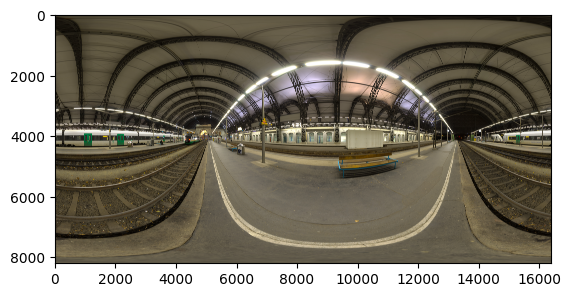

In [3]:
img = cv2.imread(EQUI_IMG)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
# 16k Equirectangular image from PolyHaven
H, W = img.shape[:2]
H, W

(8192, 16384)

In [5]:
HH = H/2
intHH = int(H/2)
intWH = int(W/2)

# Target cylindrical image dimension
# See https://github.com/araobp/virtual-showroom/blob/main/AI_Controlled.md
TARGET_H = 2797
intTARGET_HH = int(TARGET_H/2)
TARGET_W = 10923
intTARGET_WH = int(TARGET_W/2)

In [6]:
map_x = np.zeros((H,W))
map_y = np.zeros((H,W))

In [7]:
d = W / 2/ math.pi
THETA = math.atan(TARGET_H/2.0/d)
THETA

0.49227817389144884

## Remap with OpenCV

In [8]:
EQUI_Y_MAX = int(HH * THETA / (math.pi/2.0))
EQUI_Y_MAX

1283

In [9]:
# Y-axis map

y_list = []

for cili_y in np.arange(-intTARGET_HH, intTARGET_HH):
    theta = math.atan(cili_y / d)
    equi_y = d * theta
    y_list.append(equi_y)

len(y_list)

2796

In [10]:
X_SHIFT = int(W/6)

In [11]:
for x in range(0, X_SHIFT):
    map_x[:, x] = W - X_SHIFT + x
for x in range(X_SHIFT, W):
    map_x[: ,x] = x - X_SHIFT

In [12]:
for x in range(W):
    for cili_y in range(-intTARGET_HH, intTARGET_HH):
        map_y[intHH-cili_y, x] = intHH - y_list[intTARGET_HH+cili_y]  

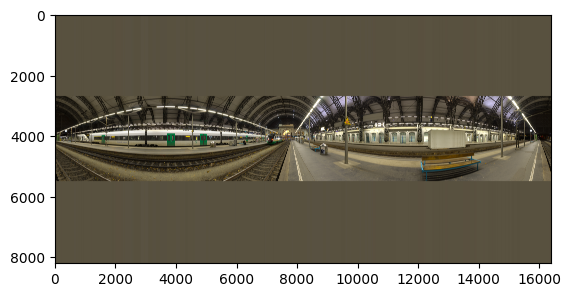

In [13]:
mapped_img = cv2.remap(img, map_x.astype(np.float32), map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(mapped_img)

In [14]:
mapped_img.shape

(8192, 16384, 3)

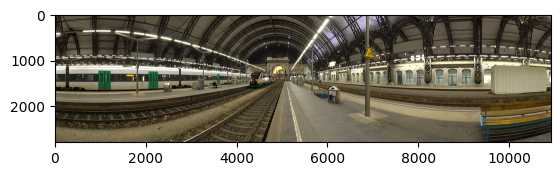

In [15]:
cropped_img = mapped_img[intHH-intTARGET_HH:intHH+intTARGET_HH, intWH-intTARGET_WH:intWH+intTARGET_WH]
plt.imshow(cropped_img)

In [16]:
cropped_img.shape, intTARGET_HH*2

((2796, 10922, 3), 2796)

In [17]:
final_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
cv2.imwrite(CONVERTED_IMG, final_img)

True